<a href="https://colab.research.google.com/github/pras-4795/JPMCColab/blob/main/29_Aug_HyperParameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import neighbors
# initialize with default hyperparameters
knn = neighbors.KNeighborsClassifier()  # This is our model
# examine the defaults
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
?knn

In [ ]:
# initialize with k = 15 and all other hyperparameters as default
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
# examine
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [ ]:
# initialize with k = 15, weights = distance and all other hyperparameters as default
knn = neighbors.KNeighborsClassifier (n_neighbors=15, weights='distance')
# examine
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


# Manually Tune Hyperparameters

In [ ]:
from sklearn import neighbors, datasets, model_selection

In [ ]:
# dataset
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data

In [ ]:
# no arguments specified
knn = neighbors.KNeighborsClassifier()

In [ ]:
# 10 folds, scored on precision
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

In [ ]:
print(cv)

[0.91666667 0.85       0.91666667 0.94736842 0.94594595 0.94444444
 0.97222222 0.92105263 0.96969697 0.97142857]


In [ ]:
# average over all folds
print(round(cv.mean(), 2))

0.94


In [ ]:
def evaluate_knn(k):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
  print(round(cv.mean(), 2))
evaluate_knn(k=7)
evaluate_knn(k=3)
evaluate_knn(k=1)
evaluate_knn(k=5)

0.93
0.93
0.92
0.94


In [ ]:
# k =5, weights evaluated using distance
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(round(cv.mean(), 2))

0.93


# Grid Search

In [ ]:
from sklearn import neighbors, datasets, model_selection
# load data
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data
# hyperparameter grid
grid = {
    'k': [1, 3, 5, 7]
}

In [ ]:
# for every value of k in the grid
for k in grid['k']:

    # initialize the knn estimator
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    # conduct a 10-fold cross-validation
    cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

    # calculate the average precision value over all folds
    cv_mean = round(cv.mean(), 3)

    # report the result
    print('With k = {}, mean precision = {}'.format(k, cv_mean))

With k = 1, mean precision = 0.919
With k = 3, mean precision = 0.928
With k = 5, mean precision = 0.936
With k = 7, mean precision = 0.931


In [ ]:
# for every value of k in the grid
for k in grid['k']:

    # initialize the knn estimator
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    # print the hyperparameterization
    print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [ ]:
# hyperparameter grid
grid = {
    'k': [1, 3, 5, 7],
    'weight_function': ['uniform', 'distance']
}
# for every value of k in the grid
for k in grid['k']:

    # and every possible weight_function in the grid
    for weight_function in grid['weight_function']:

        # initialize the knn estimator
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_function)

        # conduct a 10-fold cross-validation
        cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

        # calculate the average precision value over all folds
        cv_mean = round(cv.mean(), 3)

        # report the result
        print('With k = {} and weight function = {}, mean precision = {}'.format(k, weight_function, cv_mean))

With k = 1 and weight function = uniform, mean precision = 0.919
With k = 1 and weight function = distance, mean precision = 0.919
With k = 3 and weight function = uniform, mean precision = 0.928
With k = 3 and weight function = distance, mean precision = 0.929
With k = 5 and weight function = uniform, mean precision = 0.936
With k = 5 and weight function = distance, mean precision = 0.93
With k = 7 and weight function = uniform, mean precision = 0.931
With k = 7 and weight function = distance, mean precision = 0.926


In [ ]:
# for every value of k in the grid
for k in grid['k']:

  # and every possible weight_function in the grid
    for weight_function in grid['weight_function']:

        # initialize the knn estimator
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_function)
        # print the hyperparameterizations
        print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n

In [ ]:
# GridSearchCV
from sklearn import model_selection, datasets, neighbors
# load the data
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data

In [ ]:
# initialize the estimator
knn = neighbors.KNeighborsClassifier()

In [ ]:
?knn

In [ ]:
# grid contains k and the weight function
grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [ ]:
# set up the grid search with scoring on precision and number of folds = 10
gscv = model_selection.GridSearchCV(estimator=knn, param_grid=grid, scoring='precision', cv=10)

In [ ]:
# start the search
gscv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [ ]:
# view the results
print(gscv.cv_results_)

{'mean_fit_time': array([0.00084722, 0.00075765, 0.0008106 , 0.00077088, 0.00080812,
       0.00080063, 0.00082998, 0.00081241]), 'std_fit_time': array([3.67632810e-04, 1.01609780e-04, 1.45586922e-04, 9.10540531e-05,
       1.10310804e-04, 1.51081903e-04, 1.66433000e-04, 2.30024418e-04]), 'mean_score_time': array([0.00581729, 0.00315456, 0.00523565, 0.00320859, 0.00516653,
       0.00353124, 0.00582812, 0.00302856]), 'std_score_time': array([0.00149231, 0.0003033 , 0.00042248, 0.00038115, 0.00035726,
       0.00060092, 0.00179285, 0.00012631]), 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'uniform', 'distance', 'uniform', 'distance'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
           

In [ ]:
import pandas as pd
# convert the results dictionary to a dataframe
results = pd.DataFrame(gscv.cv_results_)
# select just the hyperparameterizations tried, the mean test scores, order by score and show the top 5 models
print(
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(5)
)

                                      params  mean_test_score
4   {'n_neighbors': 5, 'weights': 'uniform'}         0.935549
6   {'n_neighbors': 7, 'weights': 'uniform'}         0.931078
5  {'n_neighbors': 5, 'weights': 'distance'}         0.930463
3  {'n_neighbors': 3, 'weights': 'distance'}         0.928752
2   {'n_neighbors': 3, 'weights': 'uniform'}         0.928438


<Axes: ylabel='params'>

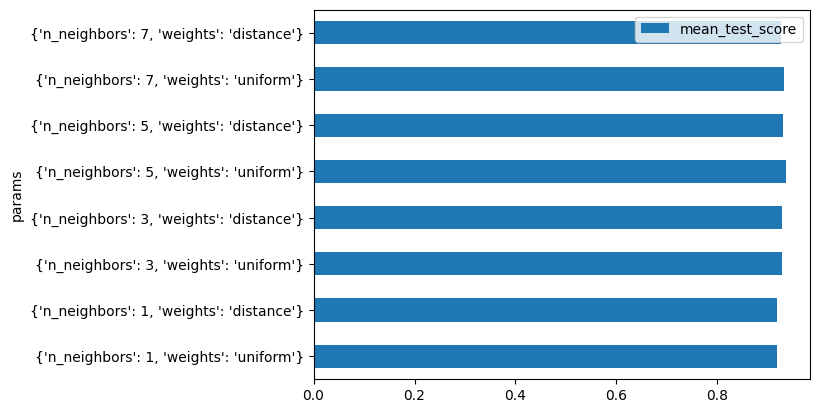

In [ ]:
# visualise the result
results.loc[:,['params','mean_test_score']].plot.barh(x = 'params')

In [ ]:
# Same thing... different dataset and model
from sklearn import datasets, svm, model_selection
# load data
digits = datasets.load_digits()
# target
y = digits.target
# features
X = digits.data

In [ ]:
clr = svm.SVC(gamma='scale')

In [ ]:
?clr

In [ ]:
# hyperparameter grid. contains linear and polynomial kernels
grid = [
  {'kernel': ['linear']},
 {'kernel': ['poly'], 'degree': [2, 3, 4]}
 ]

In [ ]:
# setting up the grid search to score on accuracy and evaluate over 10 folds
cv_spec = model_selection.GridSearchCV(estimator=clr, param_grid=grid, scoring='accuracy', cv=10)

In [ ]:
cv_spec.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# what is the available information
print(cv_spec.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [ ]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(cv_spec.cv_results_)
print(
# show hyperparameterizations
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False)
)

                            params  mean_test_score
2  {'degree': 3, 'kernel': 'poly'}         0.977734
3  {'degree': 4, 'kernel': 'poly'}         0.973284
1  {'degree': 2, 'kernel': 'poly'}         0.970500
0             {'kernel': 'linear'}         0.960487


<Axes: ylabel='params'>

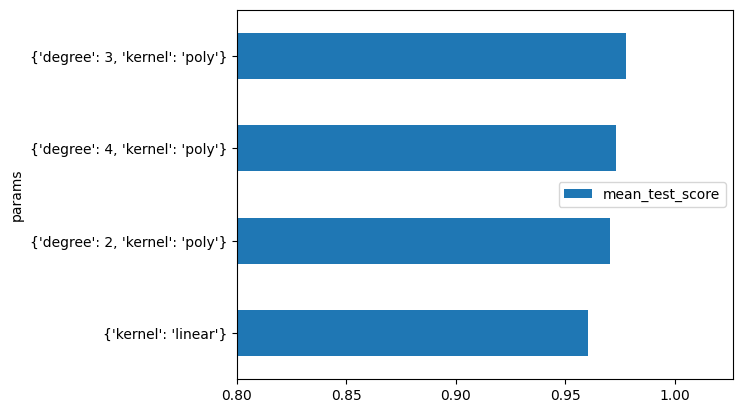

In [ ]:
# visualize the result
(
    results.loc[:,['params','mean_test_score']]
    .sort_values('mean_test_score', ascending=True)
    .plot.barh(x='params', xlim=(0.8))
)

# Random Search

In [ ]:
from sklearn import datasets, linear_model, model_selection
# load the data
diabetes = datasets.load_diabetes()
# target
y = diabetes.target
# features
X = diabetes.data

In [ ]:
# the first patient has index 0
print(y[0])

151.0


In [ ]:
# let's look at the first patients data
print(
  dict(zip(diabetes.feature_names, X[0]))
)

{'age': 0.038075906433423026, 'sex': 0.05068011873981862, 'bmi': 0.061696206518683294, 'bp': 0.0218723855140367, 's1': -0.04422349842444599, 's2': -0.03482076283769895, 's3': -0.04340084565202491, 's4': -0.002592261998183278, 's5': 0.019907486170462722, 's6': -0.01764612515980379}


In [44]:
from sklearn import datasets, model_selection, linear_model
# load the data
diabetes = datasets.load_diabetes()
# target
y = diabetes.target
# features
X = diabetes.data
# initialise the ridge regression
reg = linear_model.Ridge()

In [45]:
from scipy import stats
# alpha ~ gamma(1,1)
param_dist = {'alpha': stats.gamma(a=1, loc=1, scale=2)}

In [46]:
# set up the random search to sample 100 values and score on negative mean squared error
rscv = model_selection.RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error')
# start the search
rscv.fit(X,y)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cd50223eaa0>},
                   scoring='neg_mean_squared_error')

In [47]:
import pandas as pd
# convert the results dictionary to a pandas data frame
results = pd.DataFrame(rscv.cv_results_)
# show the top 5 hyperparamaterizations
print(results.loc[:,['params','rank_test_score']].sort_values('rank_test_score').head(5))

                           params  rank_test_score
15  {'alpha': 1.0103334465685874}                1
3   {'alpha': 1.0115213199386164}                2
16  {'alpha': 1.0513482533270095}                3
90  {'alpha': 1.0803005797919871}                4
36  {'alpha': 1.1172368894151206}                5


In [48]:
from sklearn import datasets
# import data
digits = datasets.load_digits()
# target
y = digits.target
# features
X = digits.data

In [49]:
from sklearn import ensemble
# an ensemble of 100 estimators
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

In [50]:
?rfc

In [51]:
# how many features do we have in our dataset?
n_features = X.shape[1]
print(n_features)

64


In [52]:
from scipy import stats
# we would like to smaple from criterion and max_features as discrete uniform distributions
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=n_features)
}

In [53]:
from sklearn import model_selection
# setting up the random search sampling 50 times and conducting 5-fold cross-validation
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy' , random_state=100)

In [54]:
rscv.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cd50466a8c0>},
                   random_state=100, scoring='accuracy')

In [55]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)
# removing duplication
distinct_results = results.loc[:,['params','mean_test_score']]
# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')
# remove duplicates
distinct_results.drop_duplicates(inplace=True)
# look at the top 5 best hyperparamaterizations
distinct_results.sort_values('mean_test_score', ascending=False).head(5)

,params,mean_test_score
3,"{'criterion': 'gini', 'max_features': 11}",0.940470
48,"{'criterion': 'gini', 'max_features': 4}",0.939913
19,"{'criterion': 'gini', 'max_features': 5}",0.937700
14,"{'criterion': 'gini', 'max_features': 3}",0.937694
21,"{'criterion': 'entropy', 'max_features': 8}",0.936582
